In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import roc_curve, roc_auc_score, auc
!pip install imbalanced-learn


In [4]:
df = pd.read_csv('Healthcare_Insurance.csv')

In [5]:
 target = 'insuranceclaim'
labels = ['Claimed','Not Claimed']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

RID Sum Insured   age     sex  weight   bmi hereditary_diseases  \
0  3zhptpup    2,00,000  60.0    male      64  24.3           NoDisease   
1  z0sfqbfr    4,00,000  49.0  female      75  22.6           NoDisease   
2  yi2l5bcu    2,00,000  32.0  female      64  17.8            Epilepsy   
3  y78y6b25    4,00,000  61.0  female      53  36.4           NoDisease   
4  vwthwjlm    4,00,000  19.0  female      50  20.6           NoDisease   

   no_of_dependents  smoker       city  bloodpressure  diabetes  regular_ex  \
0                 1       0     Mumbay             72         0           0   
1                 1       0  Bangalore             78         1           1   
2                 2       1   Hydrabad             88         1           1   
3                 1       1    Chennai             72         1           0   
4                 0       0      Kovai             82         1           0   

     job_title    claim  Label  
0        Actor  13112.6      0  
1     Engineer   9567.0      1  
2  Academician  32734.2      0  
3         Chef  48517.6      1  
4   HomeMakers   1731.7      0


Inference: The Datset consists of 16 features & 15000 samples.


In [6]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RID                  14999 non-null  object 
 1   Sum Insured          15000 non-null  object 
 2   age                  14604 non-null  float64
 3   sex                  15000 non-null  object 
 4   weight               15000 non-null  int64  
 5   bmi                  14044 non-null  float64
 6   hereditary_diseases  15000 non-null  object 
 7   no_of_dependents     15000 non-null  int64  
 8   smoker               15000 non-null  int64  
 9   city                 15000 non-null  object 
 10  bloodpressure        15000 non-null  int64  
 11  diabetes             15000 non-null  int64  
 12  regular_ex           15000 non-null  int64  
 13  job_title            15000 non-null  object 
 14  claim                15000 non-null  float64
 15  Label                15000 non-null 

In [7]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

sex                        2
smoker                     2
diabetes                   2
regular_ex                 2
Label                      2
Sum Insured                6
no_of_dependents           6
hereditary_diseases       10
job_title                 35
age                       47
weight                    58
bloodpressure             69
city                     107
bmi                      269
claim                   2054
RID                    14999
dtype: int64

In [8]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 9 numerical & 7 categorical features.


                               Visualising Categorical Features:                                


/Users/srikar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/srikar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/srikar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

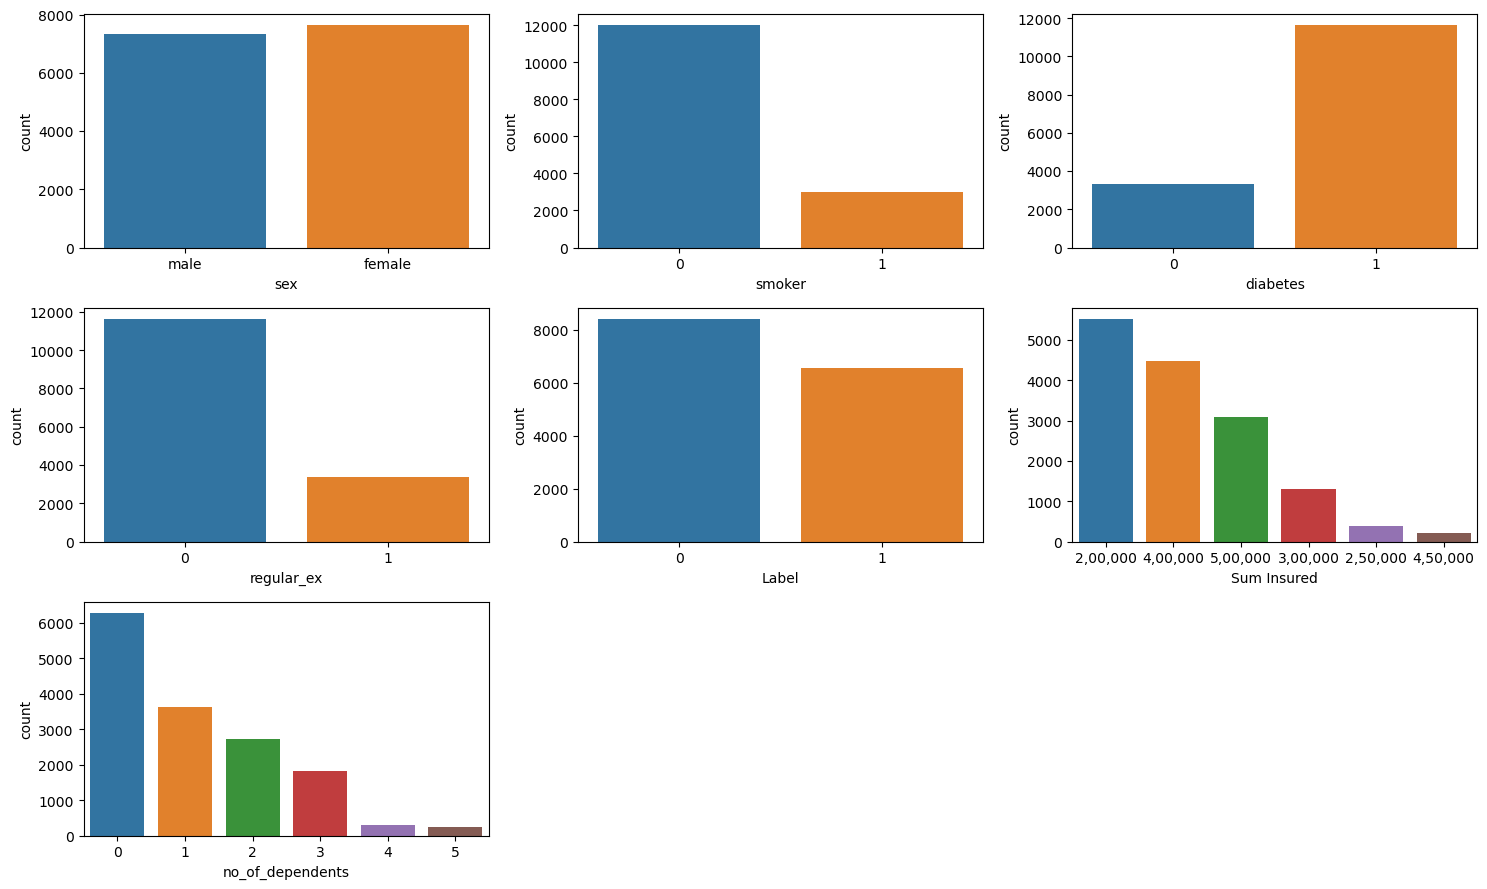

In [9]:
#Visualising the categorical features 
import math
print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=6:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

In [10]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(sorted(df[target].unique())):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

KeyError: 'insuranceclaim'

/Users/srikar/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


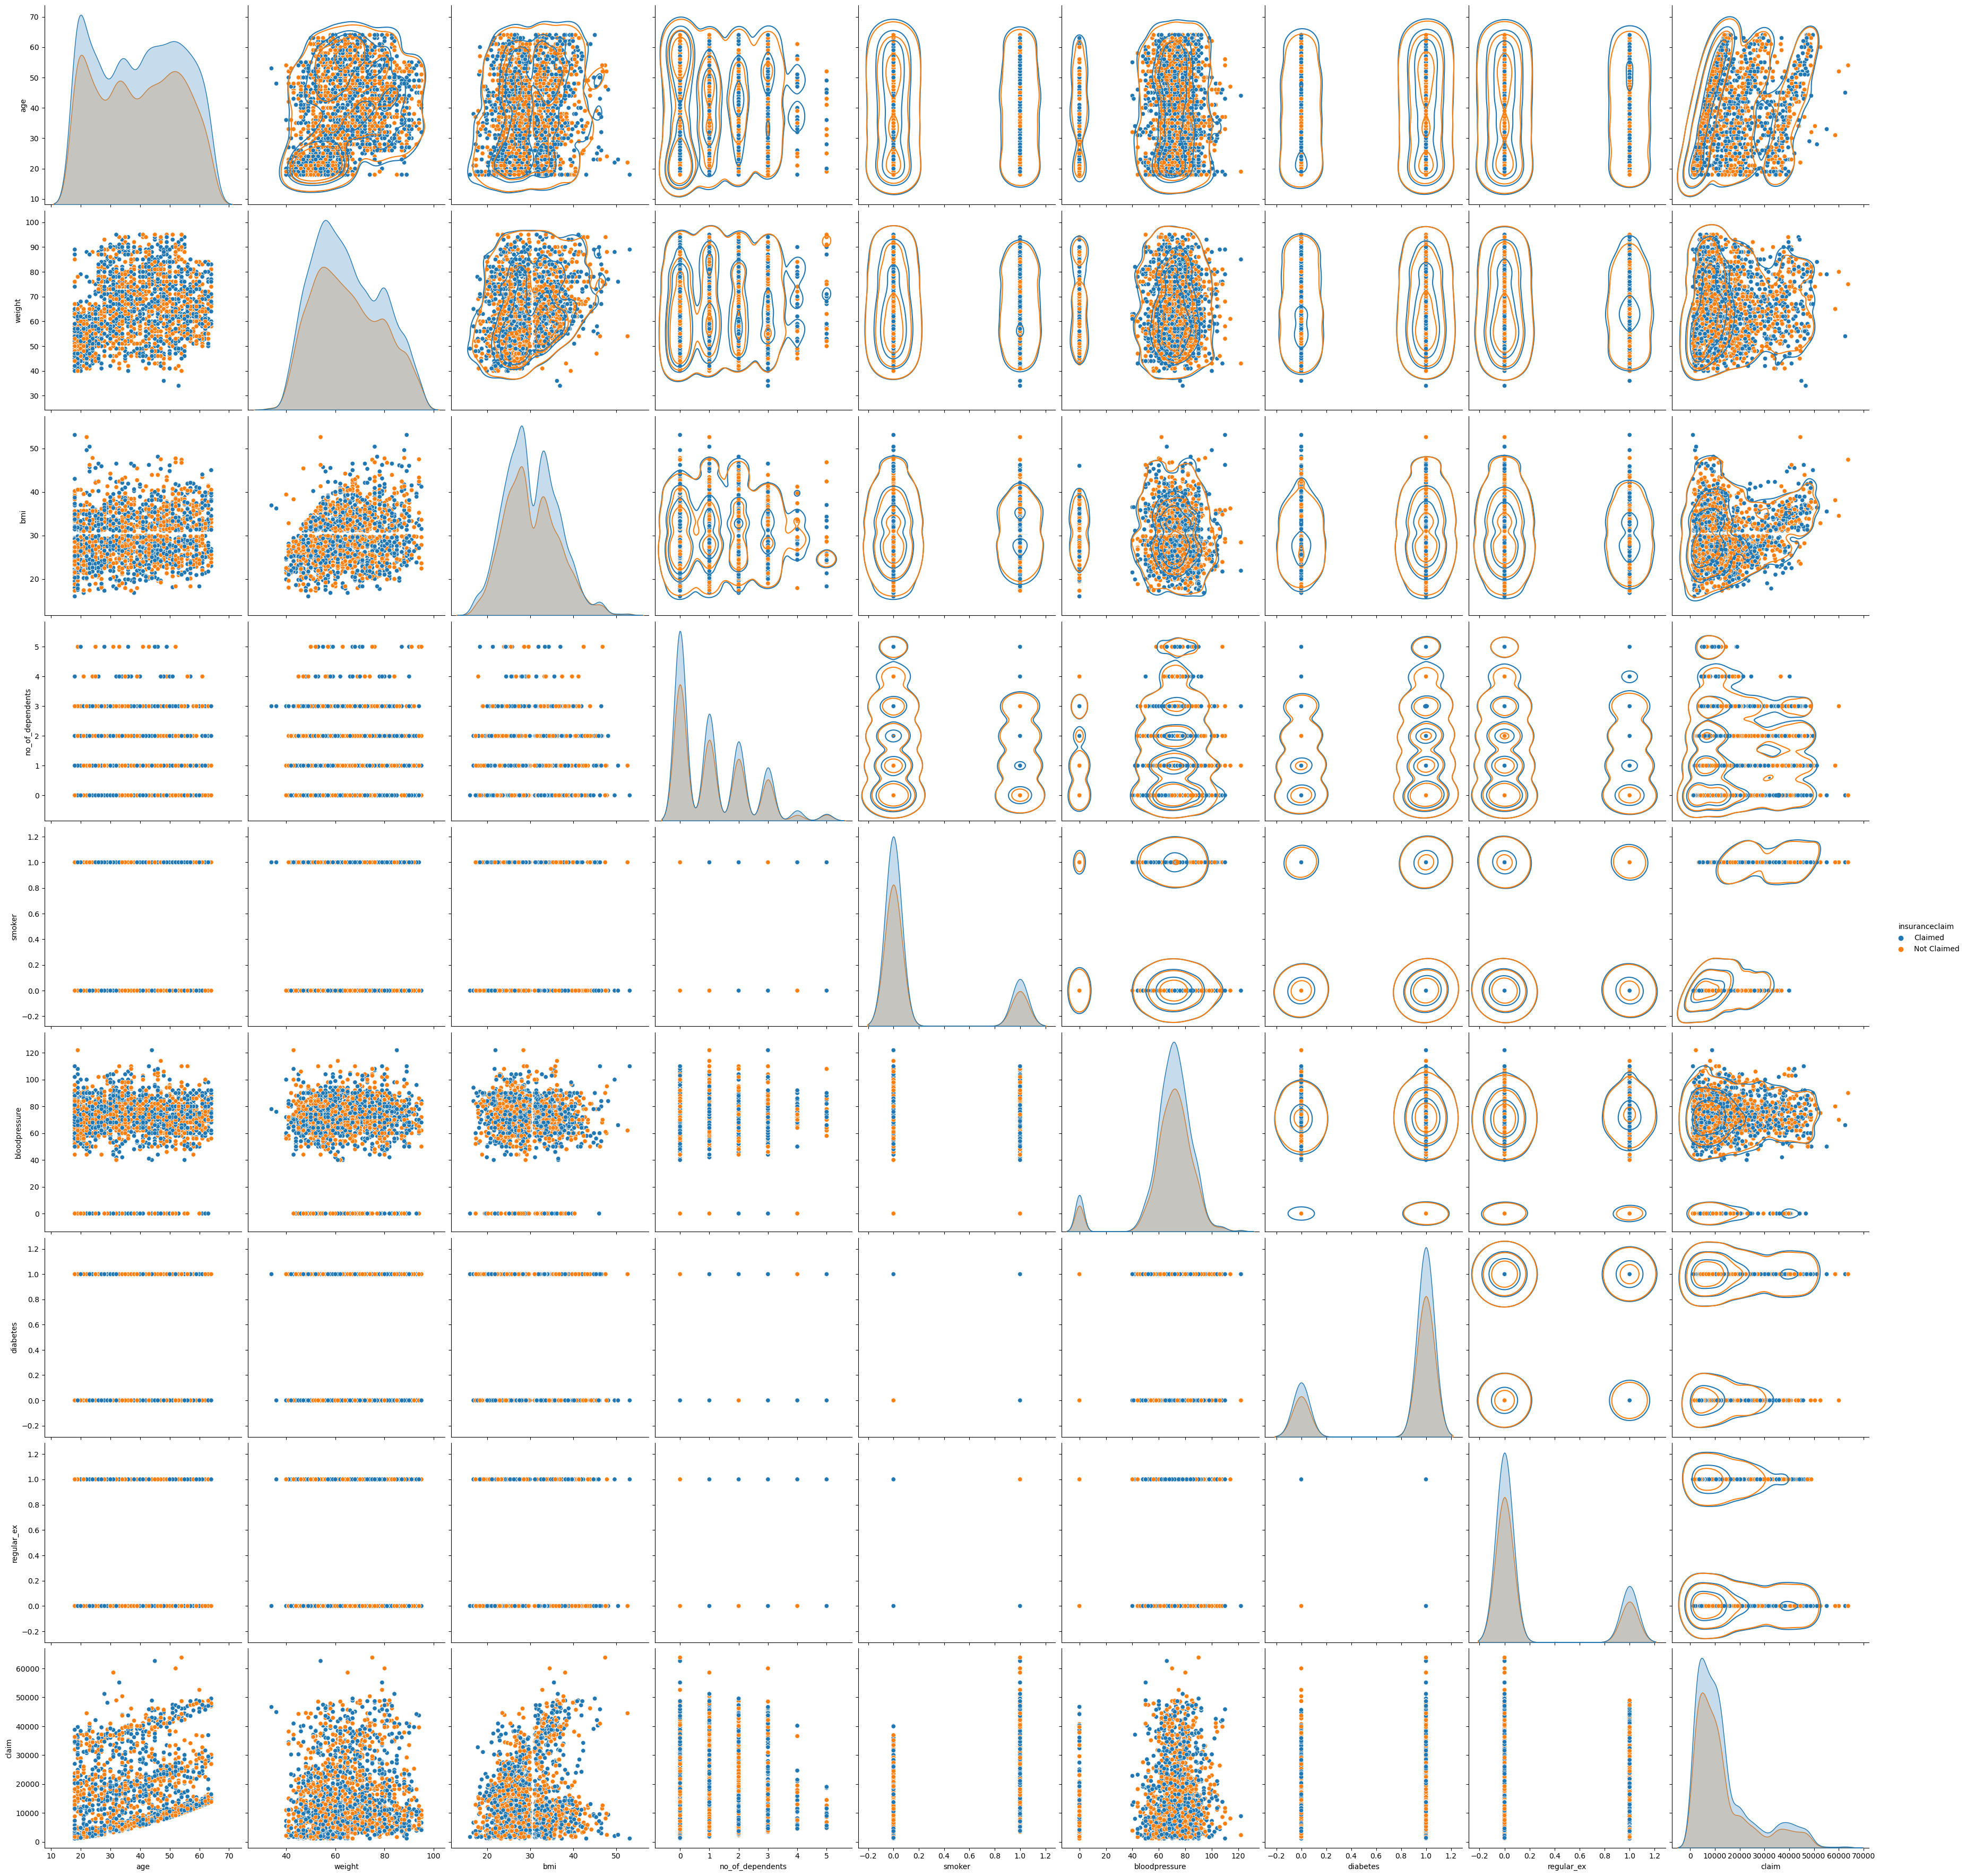

NameError: name 'warnings' is not defined

In [26]:
#Understanding the relationship between all the features

g=sns.pairplot(df1, hue=target, size=4)
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()
warnings.warn(msg, UserWarning)

In [11]:
df.head(100)

RID Sum Insured   age     sex  weight   bmi hereditary_diseases  \
0   3zhptpup    2,00,000  60.0    male      64  24.3           NoDisease   
1   z0sfqbfr    4,00,000  49.0  female      75  22.6           NoDisease   
2   yi2l5bcu    2,00,000  32.0  female      64  17.8            Epilepsy   
3   y78y6b25    4,00,000  61.0  female      53  36.4           NoDisease   
4   vwthwjlm    4,00,000  19.0  female      50  20.6           NoDisease   
..       ...         ...   ...     ...     ...   ...                 ...   
95  b3ciolsp    4,00,000  46.0  female      65  27.7           NoDisease   
96  dbxp7dlt    2,00,000  44.0    male      64  31.4           Alzheimer   
97  jme8gszw    5,00,000  46.0    male      91  25.7           NoDisease   
98  zltp8ei4    5,00,000  26.0    male      83  46.5           NoDisease   
99  bc00vths    4,00,000  32.0    male      72  46.5           NoDisease   

    no_of_dependents  smoker        city  bloodpressure  diabetes  regular_ex  \
0                  1       0      Mumbay             72         0           0   
1                  1       0   Bangalore             78         1           1   
2                  2       1    Hydrabad             88         1           1   
3                  1       1     Chennai             72         1           0   
4                  0       0       Kovai             82         1           0   
..               ...     ...         ...            ...       ...         ...   
95                 1       0    Stamford             84         1           1   
96                 1       1   Worcester             80         1           0   
97                 3       0     Atlanta             60         0           0   
98                 1       0  Brimingham             80         1           0   
99                 2       0  Charleston             54         1           0   

       job_title    claim  Label  
0          Actor  13112.6      0  
1       Engineer   9567.0      1  
2    Academician  32734.2      0  
3           Chef  48517.6      1  
4     HomeMakers   1731.7      0  
..           ...      ...    ...  
95        Farmer   8232.6      0  
96           CEO  39556.5      0  
97  FilmDirector   9301.9      1  
98  FilmDirector   2927.1      1  
99        Dancer   4686.4      0  

[100 rows x 16 columns]

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RID                  14999 non-null  object 
 1   Sum Insured          15000 non-null  object 
 2   age                  14604 non-null  float64
 3   sex                  15000 non-null  object 
 4   weight               15000 non-null  int64  
 5   bmi                  14044 non-null  float64
 6   hereditary_diseases  15000 non-null  object 
 7   no_of_dependents     15000 non-null  int64  
 8   smoker               15000 non-null  int64  
 9   city                 15000 non-null  object 
 10  bloodpressure        15000 non-null  int64  
 11  diabetes             15000 non-null  int64  
 12  regular_ex           15000 non-null  int64  
 13  job_title            15000 non-null  object 
 14  claim                15000 non-null  float64
 15  Label                15000 non-null 

In [13]:
# Feature engineering
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 120], labels=['0-18', '19-30', '31-45', '46-60', '61+'])
df['bmi_category'] = pd.cut(df['bmi'], bins=[-1, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['bp_category'] = pd.cut(df['bloodpressure'], bins=[-1, 120, 139, 159, 1000], labels=['Normal', 'Pre-Hypertension', 'Stage 1', 'Stage 2'])
df['dependents_group'] = pd.cut(df['no_of_dependents'], bins=[-1, 0, 2, 100], labels=['No dependents', '1-2 dependents', '3+ dependents'])

In [14]:
df.head(100)

RID Sum Insured   age     sex  weight   bmi hereditary_diseases  \
0   3zhptpup    2,00,000  60.0    male      64  24.3           NoDisease   
1   z0sfqbfr    4,00,000  49.0  female      75  22.6           NoDisease   
2   yi2l5bcu    2,00,000  32.0  female      64  17.8            Epilepsy   
3   y78y6b25    4,00,000  61.0  female      53  36.4           NoDisease   
4   vwthwjlm    4,00,000  19.0  female      50  20.6           NoDisease   
..       ...         ...   ...     ...     ...   ...                 ...   
95  b3ciolsp    4,00,000  46.0  female      65  27.7           NoDisease   
96  dbxp7dlt    2,00,000  44.0    male      64  31.4           Alzheimer   
97  jme8gszw    5,00,000  46.0    male      91  25.7           NoDisease   
98  zltp8ei4    5,00,000  26.0    male      83  46.5           NoDisease   
99  bc00vths    4,00,000  32.0    male      72  46.5           NoDisease   

    no_of_dependents  smoker        city  bloodpressure  diabetes  regular_ex  \
0                  1       0      Mumbay             72         0           0   
1                  1       0   Bangalore             78         1           1   
2                  2       1    Hydrabad             88         1           1   
3                  1       1     Chennai             72         1           0   
4                  0       0       Kovai             82         1           0   
..               ...     ...         ...            ...       ...         ...   
95                 1       0    Stamford             84         1           1   
96                 1       1   Worcester             80         1           0   
97                 3       0     Atlanta             60         0           0   
98                 1       0  Brimingham             80         1           0   
99                 2       0  Charleston             54         1           0   

       job_title    claim  Label age_group bmi_category bp_category  \
0          Actor  13112.6      0     46-60       Normal      Normal   
1       Engineer   9567.0      1     46-60       Normal      Normal   
2    Academician  32734.2      0     31-45  Underweight      Normal   
3           Chef  48517.6      1       61+        Obese      Normal   
4     HomeMakers   1731.7      0     19-30       Normal      Normal   
..           ...      ...    ...       ...          ...         ...   
95        Farmer   8232.6      0     46-60   Overweight      Normal   
96           CEO  39556.5      0     31-45        Obese      Normal   
97  FilmDirector   9301.9      1     46-60   Overweight      Normal   
98  FilmDirector   2927.1      1     19-30        Obese      Normal   
99        Dancer   4686.4      0     31-45        Obese      Normal   

   dependents_group  
0    1-2 dependents  
1    1-2 dependents  
2    1-2 dependents  
3    1-2 dependents  
4     No dependents  
..              ...  
95   1-2 dependents  
96   1-2 dependents  
97    3+ dependents  
98   1-2 dependents  
99   1-2 dependents  

[100 rows x 20 columns]

In [15]:
df.fillna(df.mean(), inplace=True)


/var/folders/25/3g3017pj0k3_xpq99ht5_yzw0000gn/T/ipykernel_38547/1920348818.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


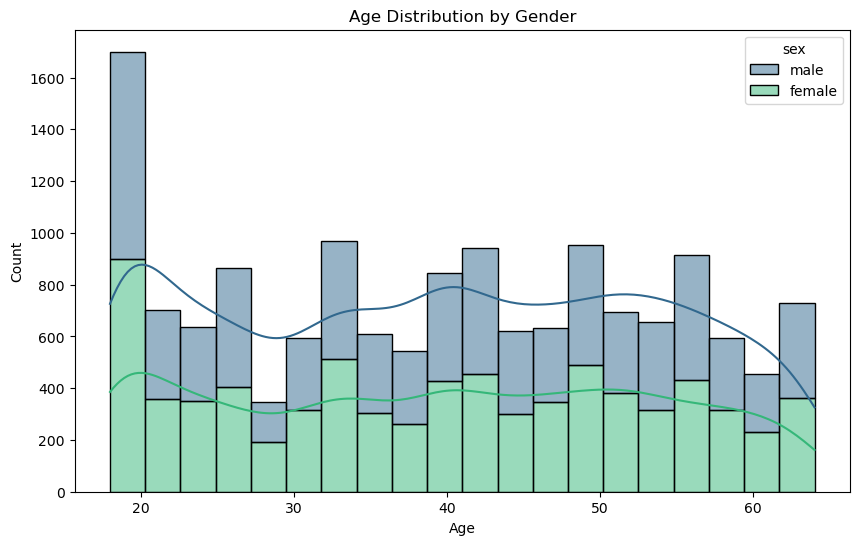

In [16]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, bins=20, hue='sex', multiple='stack', palette='viridis')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

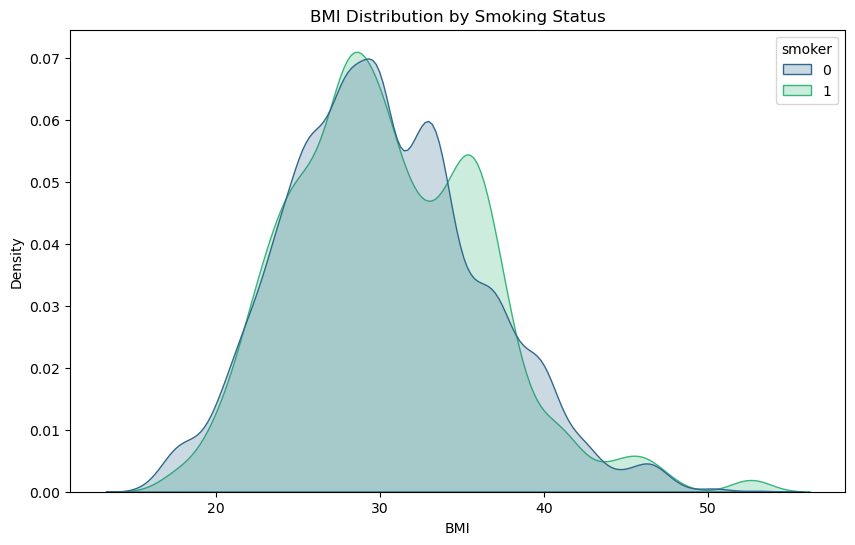

In [17]:
# BMI distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='bmi', hue='smoker', fill=True, common_norm=False, palette='viridis')
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

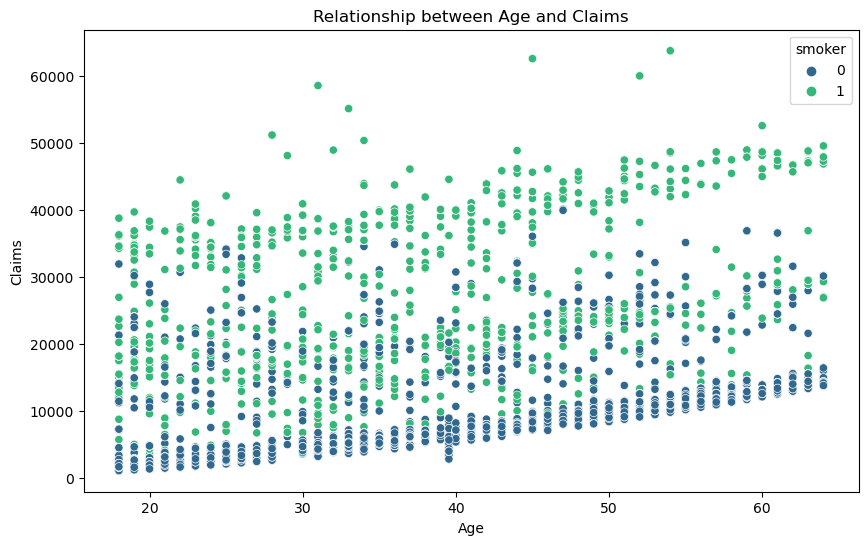

In [18]:
# Relationship between age and claims
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='claim', hue='smoker', palette='viridis')
plt.title('Relationship between Age and Claims')
plt.xlabel('Age')
plt.ylabel('Claims')
plt.show()

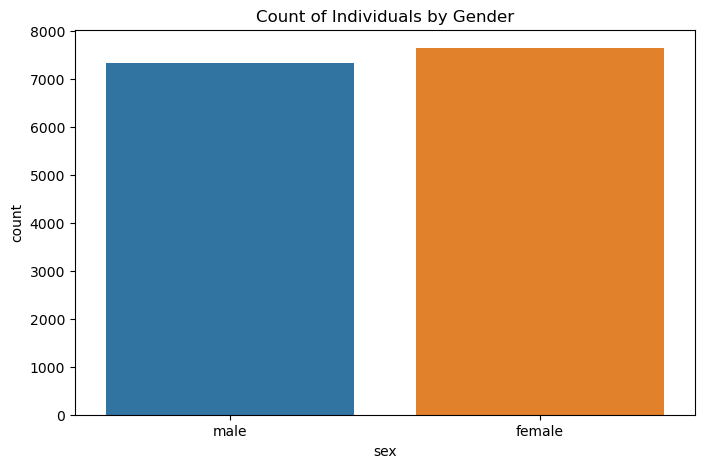

In [19]:
# Other visualizations and analysis based on your specific needs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For example, countplot for categorical variables like 'sex'
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=df)
plt.title('Count of Individuals by Gender')
plt.show()

In [21]:
# Create the 'Claim_Category' column based on the specified conditions
df['Claim_Category'] = pd.cut(df['claim'], bins=[-float('inf'), 5000, 10000, float('inf')],
                              labels=['Low Claim', 'Average Claim', 'High Claim'])

# Display the DataFrame with the new column
print(df)

            RID Sum Insured   age     sex  weight   bmi hereditary_diseases  \
0      3zhptpup    2,00,000  60.0    male      64  24.3           NoDisease   
1      z0sfqbfr    4,00,000  49.0  female      75  22.6           NoDisease   
2      yi2l5bcu    2,00,000  32.0  female      64  17.8            Epilepsy   
3      y78y6b25    4,00,000  61.0  female      53  36.4           NoDisease   
4      vwthwjlm    4,00,000  19.0  female      50  20.6           NoDisease   
...         ...         ...   ...     ...     ...   ...                 ...   
14995  ialyl29r    2,00,000  39.0    male      49  28.3           NoDisease   
14996  cr035n0w    4,00,000  39.0    male      74  29.6           NoDisease   
14997  8u6o2sqc    4,00,000  20.0    male      62  33.3           NoDisease   
14998  uatzwmxm    5,00,000  52.0    male      88  36.7           NoDisease   
14999  6zzex9eu    4,00,000  52.0    male      57  26.4           NoDisease   

       no_of_dependents  smoker        city  ...  d

In [24]:
# Create age groups
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)


In [25]:
# Replace missing bmi values with the mean value of bmi for their specific age_group
df['bmi'] = df.groupby('age_group')['bmi'].transform(lambda x: x.fillna(x.mean()))

# Display the DataFrame after replacing missing values
print(df)

            RID Sum Insured   age     sex  weight   bmi hereditary_diseases  \
0      3zhptpup    2,00,000  60.0    male      64  24.3           NoDisease   
1      z0sfqbfr    4,00,000  49.0  female      75  22.6           NoDisease   
2      yi2l5bcu    2,00,000  32.0  female      64  17.8            Epilepsy   
3      y78y6b25    4,00,000  61.0  female      53  36.4           NoDisease   
4      vwthwjlm    4,00,000  19.0  female      50  20.6           NoDisease   
...         ...         ...   ...     ...     ...   ...                 ...   
14995  ialyl29r    2,00,000  39.0    male      49  28.3           NoDisease   
14996  cr035n0w    4,00,000  39.0    male      74  29.6           NoDisease   
14997  8u6o2sqc    4,00,000  20.0    male      62  33.3           NoDisease   
14998  uatzwmxm    5,00,000  52.0    male      88  36.7           NoDisease   
14999  6zzex9eu    4,00,000  52.0    male      57  26.4           NoDisease   

       no_of_dependents  smoker        city  ...  d

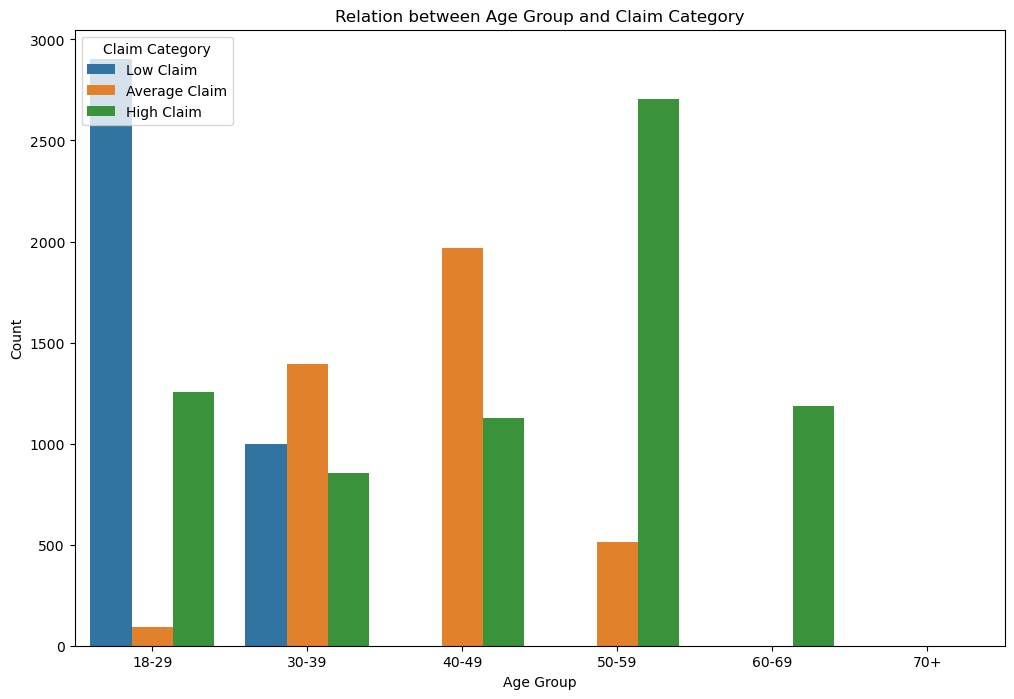

In [26]:
# Set the order for age groups and claim categories
age_group_order = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
claim_category_order = ['Low Claim', 'Average Claim', 'High Claim']


# Create an overlapped and clustered bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='age_group', hue='Claim_Category', order=age_group_order, hue_order=claim_category_order, data=df, dodge=True)
plt.title('Relation between Age Group and Claim Category')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Claim Category')
plt.show()


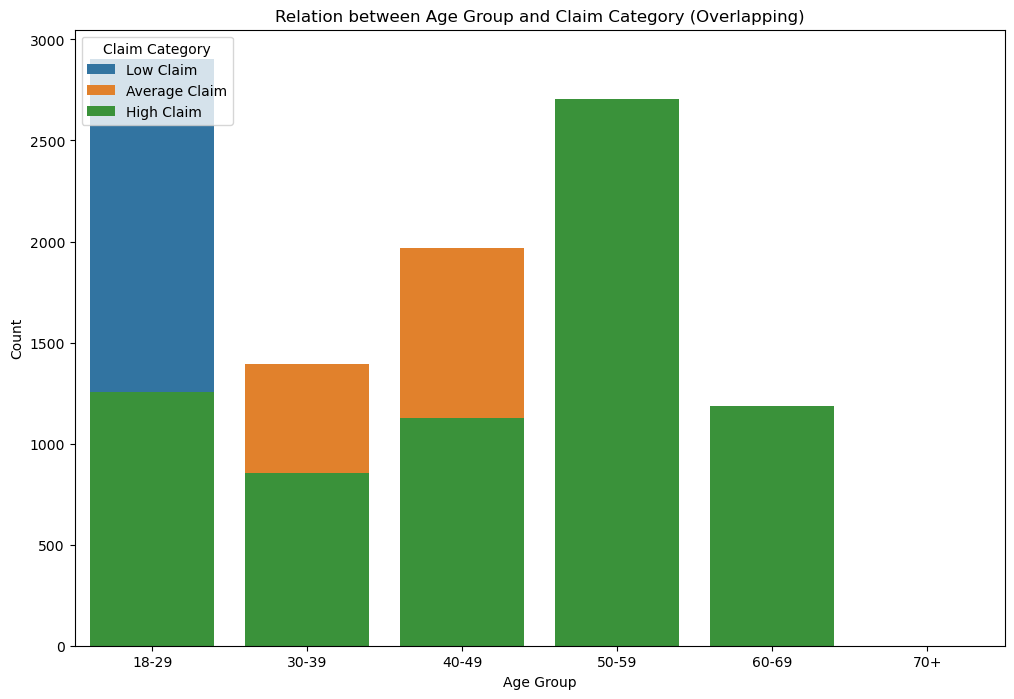

In [27]:
# Set the order for age groups and claim categories
age_group_order = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
claim_category_order = ['Low Claim', 'Average Claim', 'High Claim']

# Create an overlapping bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='age_group', hue='Claim_Category', order=age_group_order, hue_order=claim_category_order, data=df, dodge=False)
plt.title('Relation between Age Group and Claim Category (Overlapping)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Claim Category')
plt.show()

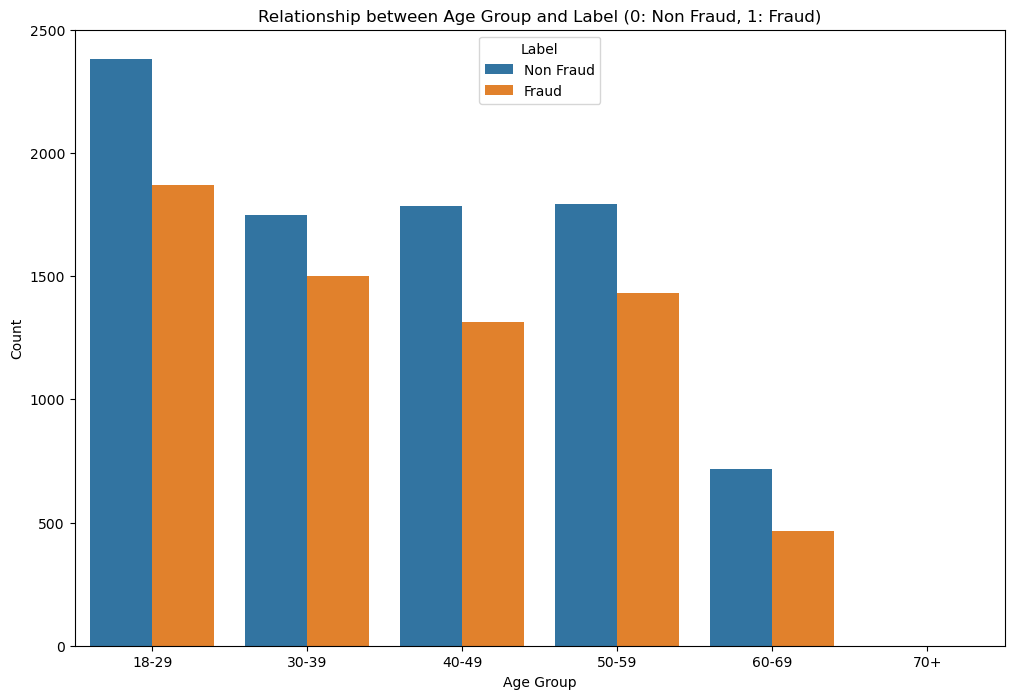

In [28]:
# Create a bar chart for the relationship between 'age_group' and 'Label'
plt.figure(figsize=(12, 8))
sns.countplot(x='age_group', hue='Label', order=age_group_order, data=df)
plt.title('Relationship between Age Group and Label (0: Non Fraud, 1: Fraud)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Non Fraud', 'Fraud'])
plt.show()

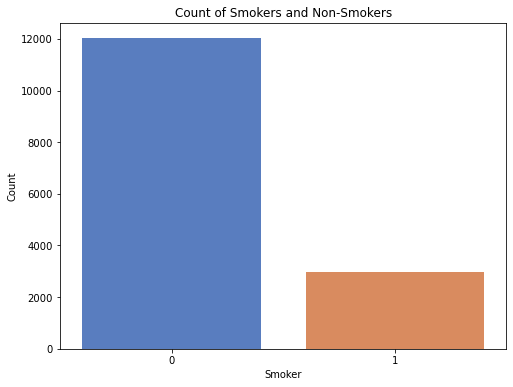

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoker', palette='muted')
plt.title('Count of Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

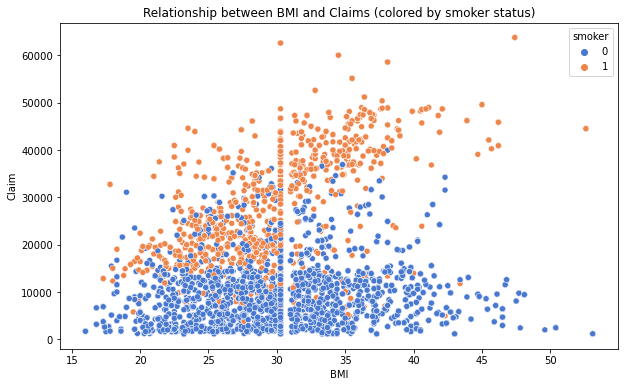

In [12]:
# Relationship between BMI and claims colored by smoker status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='claim', hue='smoker', palette='muted')
plt.title('Relationship between BMI and Claims (colored by smoker status)')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.show()

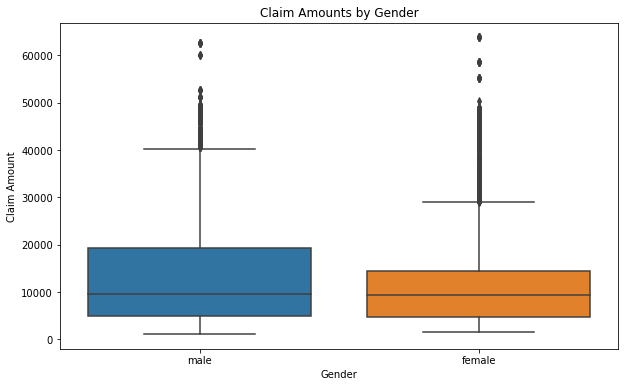

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='claim', data=df)
plt.title('Claim Amounts by Gender')
plt.xlabel('Gender')
plt.ylabel('Claim Amount')
plt.show()

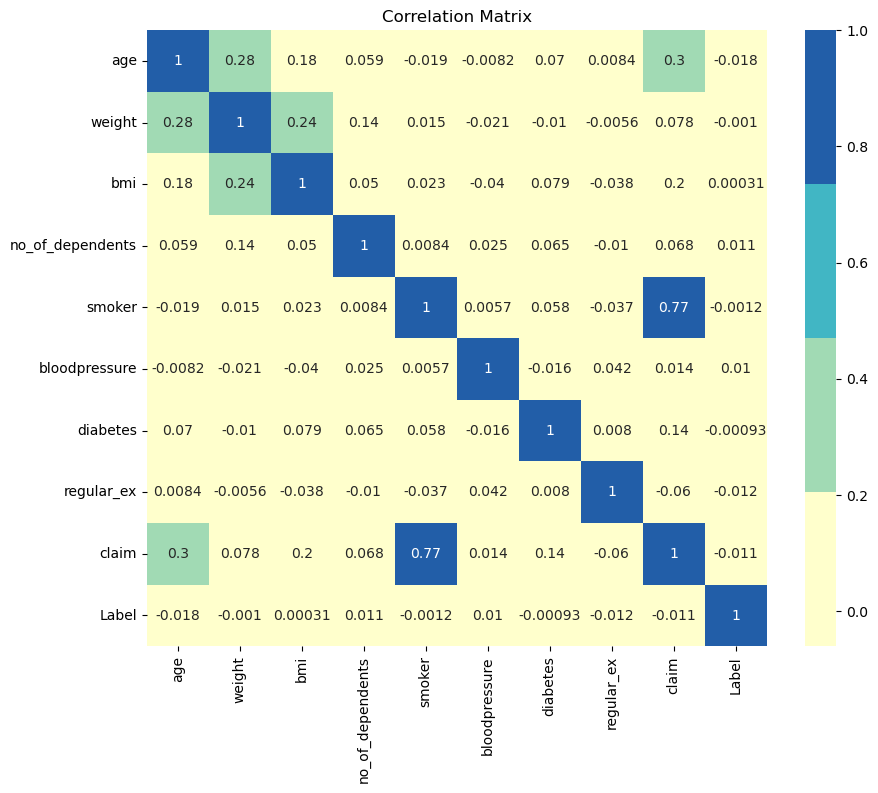

In [29]:
# Create a custom colormap with modified color intensity
custom_cmap = sns.color_palette(['#ffffcc', '#a1dab4', '#41b6c4', '#225ea8'])
correlation_matrix = df.corr()

# Create a heatmap with the custom colormap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap)
plt.title('Correlation Matrix')
plt.show()

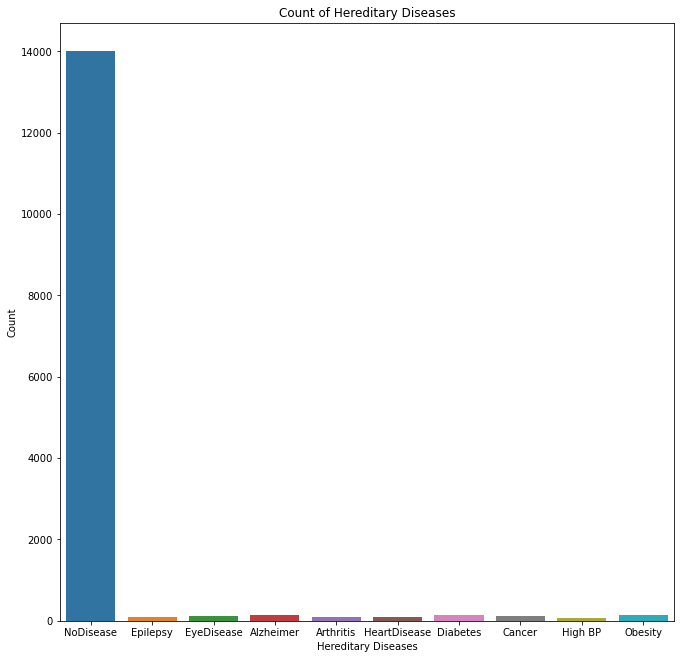

In [14]:
plt.figure(figsize=(11, 11))
sns.countplot(x='hereditary_diseases', data=df)
plt.title('Count of Hereditary Diseases')
plt.xlabel('Hereditary Diseases')
plt.ylabel('Count')
plt.show()

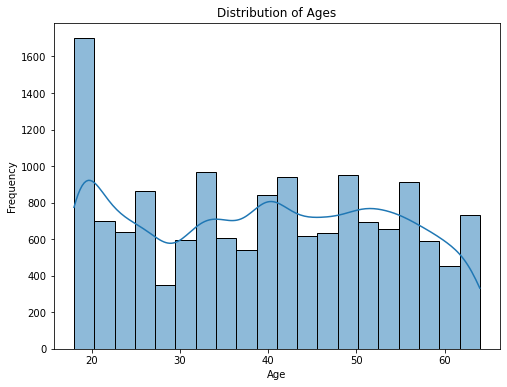

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

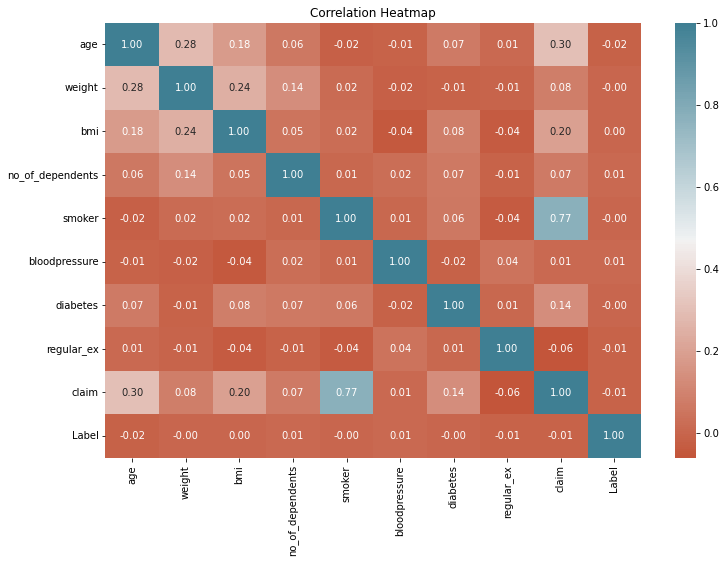

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200), fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

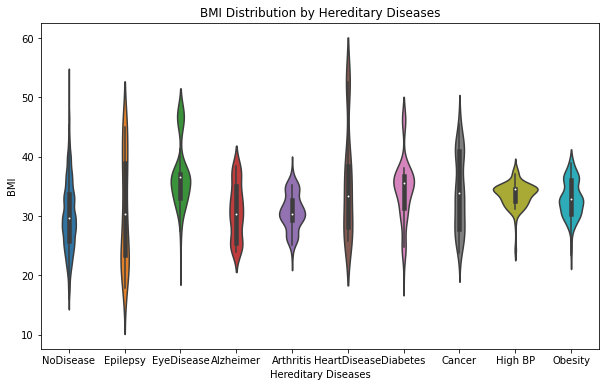

In [17]:
#Violinplot of BMI by Hereditary Diseases
plt.figure(figsize=(10, 6))
sns.violinplot(x='hereditary_diseases', y='bmi', data=df)
plt.title('BMI Distribution by Hereditary Diseases')
plt.xlabel('Hereditary Diseases')
plt.ylabel('BMI')
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [19]:
df['Sum Insured'] = df['Sum Insured'].str.replace(',', '').astype(float)


In [20]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['hereditary_diseases'] = label_encoder.fit_transform(df['hereditary_diseases'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['city'] = label_encoder.fit_transform(df['city'])
df['job_title'] = label_encoder.fit_transform(df['job_title'])
df['age_group'] = label_encoder.fit_transform(df['job_title'])
df['bmi_category'] = label_encoder.fit_transform(df['bmi_category'])
df['bp_category'] = label_encoder.fit_transform(df['bp_category'])
df['dependents_group'] = label_encoder.fit_transform(df['dependents_group'])

In [21]:
df.fillna(df.mean(), inplace=True)

C:\Users\nazari\AppData\Local\Temp\ipykernel_16864\820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [22]:
X = df.drop(['RID', 'bmi','age', 'Sum Insured','job_title','city','Label'], axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.56
Confusion Matrix:
[[2509    0]
 [1991    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      2509
           1       0.00      0.00      0.00      1991

    accuracy                           0.56      4500
   macro avg       0.28      0.50      0.36      4500
weighted avg       0.31      0.56      0.40      4500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.52
Confusion Matrix:
[[1619  890]
 [1258  733]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.65      0.60      2509
           1       0.45      0.37      0.41      1991

    accuracy                           0.52      4500
   macro avg       0.51      0.51      0.50      4500
weighted avg       0.51      0.52      0.51      4500



In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.56
Confusion Matrix:
[[2475   34]
 [1953   38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.99      0.71      2509
           1       0.53      0.02      0.04      1991

    accuracy                           0.56      4500
   macro avg       0.54      0.50      0.38      4500
weighted avg       0.55      0.56      0.41      4500



In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check class distribution before oversampling
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 5913, 1: 4587})
After SMOTE: Counter({1: 5913, 0: 5913})


In [27]:
# Now, train your model using the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.49
Confusion Matrix:
[[1075 1434]
 [ 847 1144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.43      0.49      2509
           1       0.44      0.57      0.50      1991

    accuracy                           0.49      4500
   macro avg       0.50      0.50      0.49      4500
weighted avg       0.51      0.49      0.49      4500



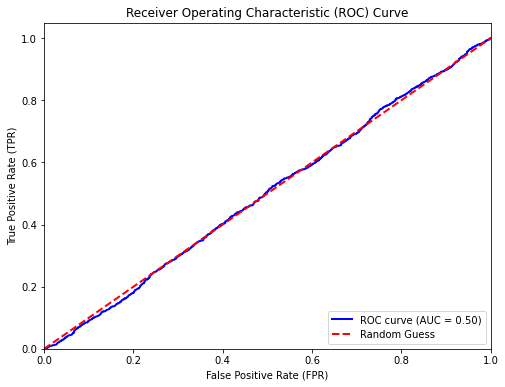

In [28]:
# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Vary the threshold and calculate true positive rate (TPR) and false positive rate (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [29]:
# Calculate AUC
auc_score = auc(fpr, tpr)
print(f"AUC: {auc_score:.2f}")

# Find the threshold closest to a custom value
custom_threshold = 0.50  # Change this to your desired custom threshold
closest_threshold_idx = (np.abs(thresholds - custom_threshold)).argmin()
closest_threshold = thresholds[closest_threshold_idx]

print(f"Closest Threshold to {custom_threshold}: {closest_threshold}")

# Calculate predictions using the custom threshold
y_pred_custom = (y_prob >= closest_threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)
classification_rep_custom = classification_report(y_test, y_pred_custom)
print(f"\nAccuracy with Custom Threshold: {accuracy_custom:.2f}")
print("Confusion Matrix with Custom Threshold:")
print(conf_matrix_custom)
print("Classification Report with Custom Threshold:")
print(classification_rep_custom)

AUC: 0.50
Closest Threshold to 0.5: 0.5000258316839653

Accuracy with Custom Threshold: 0.49
Confusion Matrix with Custom Threshold:
[[1075 1434]
 [ 847 1144]]
Classification Report with Custom Threshold:
              precision    recall  f1-score   support

           0       0.56      0.43      0.49      2509
           1       0.44      0.57      0.50      1991

    accuracy                           0.49      4500
   macro avg       0.50      0.50      0.49      4500
weighted avg       0.51      0.49      0.49      4500



In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set using Random Forest classifier
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(classification_rep_rf)


Random Forest Classifier:
Accuracy: 0.51
Confusion Matrix:
[[1417 1092]
 [1130  861]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      2509
           1       0.44      0.43      0.44      1991

    accuracy                           0.51      4500
   macro avg       0.50      0.50      0.50      4500
weighted avg       0.51      0.51      0.51      4500



In [31]:
from sklearn.naive_bayes import GaussianNB

# Train Gaussian Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set using Gaussian Naive Bayes classifier
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Gaussian Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

print("\nGaussian Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_nb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_nb)
print("Classification Report:")
print(classification_rep_nb)



Gaussian Naive Bayes Classifier:
Accuracy: 0.47
Confusion Matrix:
[[ 555 1954]
 [ 450 1541]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.22      0.32      2509
           1       0.44      0.77      0.56      1991

    accuracy                           0.47      4500
   macro avg       0.50      0.50      0.44      4500
weighted avg       0.50      0.47      0.42      4500



In [32]:
X = df.drop(['RID', 'claim', 'Label'], axis=1)  # Dropping 'RID', 'claim', and 'Label' columns
y = df['claim']
from sklearn.linear_model import LinearRegression


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the training set to demonstrate
predictions_train = lr.predict(X_train)
predictions_test = lr.predict(X_test)


In [33]:
new_df = pd.DataFrame(X_train,index=[0])
new_df

Sum Insured   age  sex  weight   bmi  hereditary_diseases  \
0     200000.0  60.0    1      64  24.3                    8   

   no_of_dependents  smoker  city  bloodpressure  diabetes  regular_ex  \
0                 1       0    62             72         0           0   

   job_title  age_group  bmi_category  bp_category  dependents_group  
0          2          2             0            0                 0

In [34]:
new_pred = lr.predict(new_df)
print("Medical Insurance cost for New Customer is:", new_pred[0])


Medical Insurance cost for New Customer is: 11534.344540881768
